<a href="https://colab.research.google.com/github/maria35813/Belmary/blob/master/%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
mnist = tf.keras.datasets.mnist

In [0]:
import matplotlib.pyplot as plt

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train=np.expand_dims(x_train,axis=3)
x_test=np.expand_dims(x_test,axis=3)
input_shape=x_train[0].shape
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation=tf.nn.relu),
tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation=tf.nn.relu),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation=tf.nn.relu),
tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation=tf.nn.relu),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation=tf.nn.relu),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [34]:
model.compile(optimizer=tf.train.AdamOptimizer(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 22s 363us/sample - loss: 0.3311 - acc: 0.8978
Epoch 2/5
60000/60000 [==============================] - 21s 343us/sample - loss: 0.0901 - acc: 0.9728
Epoch 3/5
60000/60000 [==============================] - 20s 341us/sample - loss: 0.0630 - acc: 0.9809
Epoch 4/5
60000/60000 [==============================] - 21s 346us/sample - loss: 0.0501 - acc: 0.9846
Epoch 5/5
10000/10000 [==============================] - 2s 172us/sample - loss: 0.0200 - acc: 0.9934


[0.01996203111275099, 0.9934]

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train[0:10000], y_train[0:10000], validation_split=0.99, epochs=5, batch_size=16)
model.evaluate(x_test, y_test)

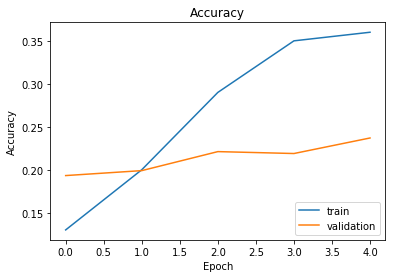

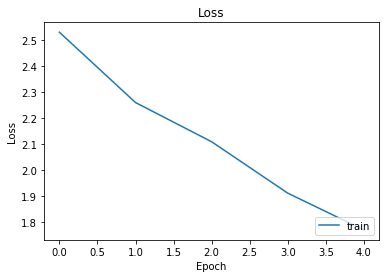

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [30]:
def to_tens(value):
    return tf.convert_to_tensor(value,dtype=None,dtype_hint=None,name=None)

sess = tf.compat.v1.Session()
guess = model.predict(x_train, use_multiprocessing=True)
defected = list()
print('\n\n\nIMG\tCROSSENTROPY')
for i in range(0,60000):
  if (guess[i].argmax() != y_train[i]):
    real = y_train[i]
    g = to_tens(guess[i])
    g.eval(session=sess)
    g_loss = tf.keras.losses.sparse_categorical_crossentropy(real, g)   
    l = g_loss.eval(session=sess)
    cross = float(g_loss.eval(session=sess))
    defected.append((i,cross))
    print(str(i) + '\t' + str(cross))
sess.close()
sort_defected = sorted(defected, reverse=True, key=lambda emp : emp[1]) 




IMG	CROSSENTROPY
0	2.328479051589966
2	2.2668163776397705
3	2.29500412940979
4	2.2716729640960693
5	2.266697406768799
6	2.308964252471924
7	2.252476930618286
8	2.2922379970550537
9	2.2911603450775146
10	2.2464067935943604
11	2.3040380477905273
14	2.2927792072296143
16	2.2567408084869385
19	2.285832643508911
20	2.264464855194092
22	2.2896201610565186
23	2.2976367473602295
24	2.360567092895508
25	2.2310585975646973
26	2.2999980449676514
27	2.217987060546875
28	2.230003833770752
29	2.2704296112060547
31	2.2556729316711426
33	2.2862610816955566
34	2.218549966812134
35	2.2957265377044678
37	2.186795711517334
38	2.3034677505493164
40	2.286515474319458
41	2.2576448917388916
42	2.292915105819702
43	2.268004894256592
45	2.2756731510162354
46	2.2554519176483154
47	2.2986130714416504
48	2.2757534980773926
49	2.240558624267578
50	2.2327194213867188
52	2.280437469482422
53	2.323734760284424
54	2.3011186122894287
57	2.2794368267059326
58	2.291315793991089
59	2.2940328121185303
60	2.25759220123291

KeyboardInterrupt: ignored

In [0]:
test_im = x_train[2939]
layer_outputs = [layer.output for layer in model.layers[:10]]

#layer_outputs=[]
#for layer in model.layers[:10]:
  #layer_outputs.append(layer)
  
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))
first_layer_activation = activations[0]
plt.imshow(first_layer_activation[0,:,:,4])
plt.show()

for i in range(10):
  if not model.layers[i].name.startswith("conv2d"):
    continue
  print("Layer: {}".format(i))
  nof=model.layers[i].filters
  first_layer_activation = activations[i]
  fig = plt.figure(figsize=(25,20))
  for k in range(nof):
    n=nof/8
    plt.subplot(n, 8, k+1)
    plt.imshow(first_layer_activation[0,:,:,k])
  plt.show()  





NameError: ignored

In [0]:
layer.output

<tf.Tensor 'conv2d_55/Relu:0' shape=(?, 26, 26, 32) dtype=float32>